### Import the libraries	

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Import Data with Flow From Directory

In [2]:
train_dir = './train_set/'
val_dir = './validation_set'
test_dir = './test_set'

target_img_shape = (64, 64) # size of input image Model (W x H)

In [3]:
train_datagen = ImageDataGenerator(rescale= 1./255, rotation_range=20, height_shift_range=0.15,  width_shift_range=0.15, shear_range=0.9,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_set = train_datagen.flow_from_directory(train_dir, target_size=target_img_shape, batch_size=32, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [4]:
val_datagen = ImageDataGenerator(rescale= 1./255)
val_set = val_datagen.flow_from_directory(val_dir, target_size=target_img_shape, batch_size=32, class_mode='binary')

Found 200 images belonging to 2 classes.


### Visualization

In [5]:
print('Training')
ids, counts = np.unique(train_set.classes, return_counts=True)
print(ids)
print(counts)

Training
[0 1]
[500 500]


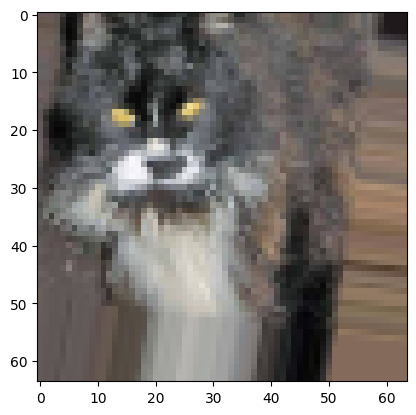

In [8]:
plt.imshow(train_set[0][0][0])
plt.show()

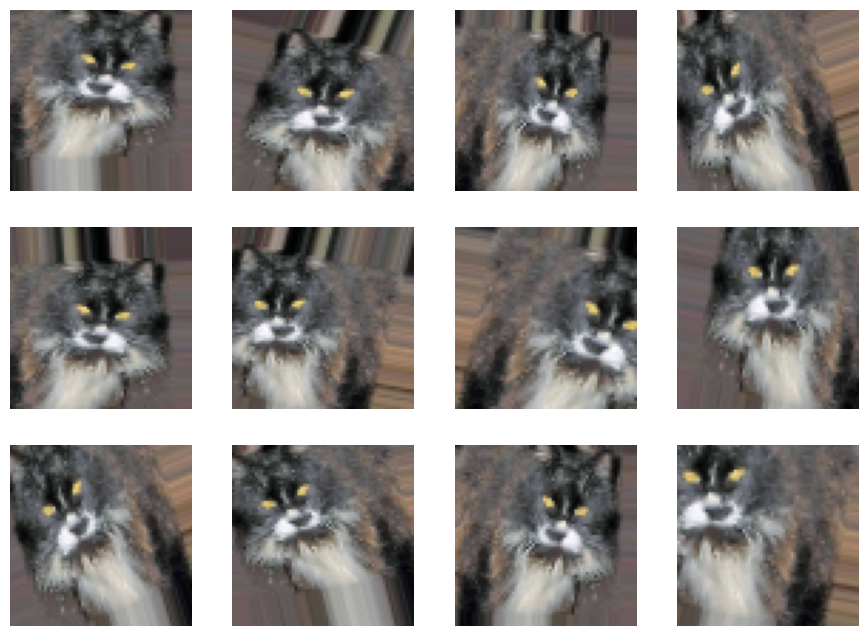

In [9]:
nplots = 12
def visual_multi(images_arr):
	fig = plt.figure(figsize=(11, 8))
	for j in range(nplots):
		plt.subplot(3, 4, j + 1)
		plt.imshow(images_arr[j])
		plt.axis('off')
	plt.show()

augmented_images = [train_set[0][0][0] for i in range(nplots)]
visual_multi(augmented_images)

In [10]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'cat', 1: 'dog'}

In [11]:
for i in ids:
	print('{:>6} = {}'.format(labels[i], counts[i]))

   cat = 500
   dog = 500


In [12]:
print('Validation')
ids, counts = np.unique(val_set.classes, return_counts=True)
print(ids)
print(counts)

Validation
[0 1]
[100 100]


In [13]:
train_set[0][0][0].shape

(64, 64, 3)

{'cat': 0, 'dog': 1}
(32, 64, 64, 3)
(32,)
class: 0.0


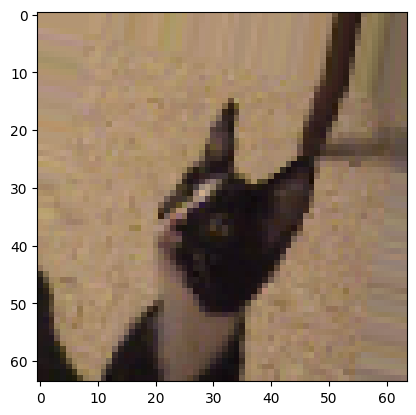

In [14]:
print(train_set.class_indices)

for image_batch, labels_batch in train_set:
	print(image_batch.shape)
	print(labels_batch.shape)
	plt.imshow(image_batch[0])
	print('class:', labels_batch[0])
	break

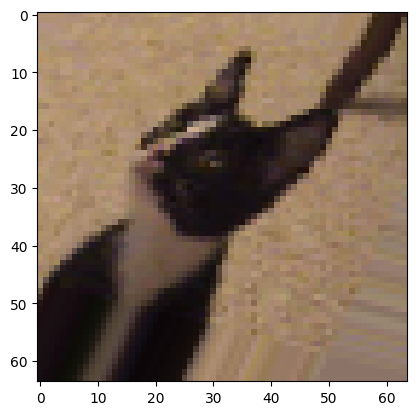

In [15]:
plt.imshow(train_set[0][0][0])
plt.show()

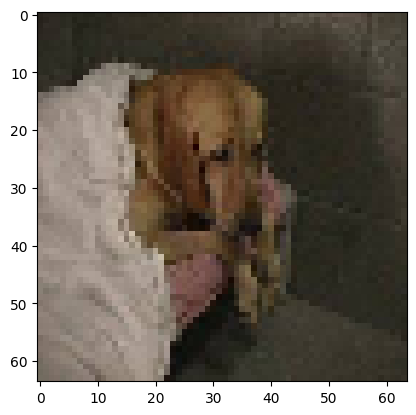

In [16]:
plt.imshow(val_set[0][0][0])
plt.show()

### Create Model

In [17]:
in_shape = (target_img_shape[0], target_img_shape[1], 3)
in_shape

(64, 64, 3)

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout, MaxPool2D

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu', input_shape=in_shape))
model.add(MaxPool2D(pool_size=(2,2)))

In [21]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [22]:
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(units=128, activation='relu'))

In [25]:
model.add(Dense(units=1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
import time

In [29]:
start = time.time()
history = model.fit(train_set, steps_per_epoch=len(train_set), validation_data=val_set, epochs=40, verbose=1)
end = time.time()
print('Time Taken: {:.2f} minutes'.format((end-start)/60))

Epoch 1/40
32/32 [==============================] - 5s 82ms/step - loss: 0.6986 - accuracy: 0.5000 - val_loss: 0.6893 - val_accuracy: 0.6500
Epoch 2/40
32/32 [==============================] - 2s 69ms/step - loss: 0.6811 - accuracy: 0.5750 - val_loss: 0.6802 - val_accuracy: 0.5200
Epoch 3/40
32/32 [==============================] - 2s 72ms/step - loss: 0.6778 - accuracy: 0.5690 - val_loss: 0.6501 - val_accuracy: 0.5950
Epoch 4/40
32/32 [==============================] - 2s 75ms/step - loss: 0.6521 - accuracy: 0.6170 - val_loss: 0.6957 - val_accuracy: 0.5600
Epoch 5/40
32/32 [==============================] - 2s 71ms/step - loss: 0.6286 - accuracy: 0.6490 - val_loss: 0.6333 - val_accuracy: 0.6250
Epoch 6/40
32/32 [==============================] - 2s 70ms/step - loss: 0.6205 - accuracy: 0.6300 - val_loss: 0.6275 - val_accuracy: 0.5800
Epoch 7/40
32/32 [==============================] - 2s 71ms/step - loss: 0.6230 - accuracy: 0.6720 - val_loss: 0.6202 - val_accuracy: 0.6350
Epoch 8/40
32

### Evaluate

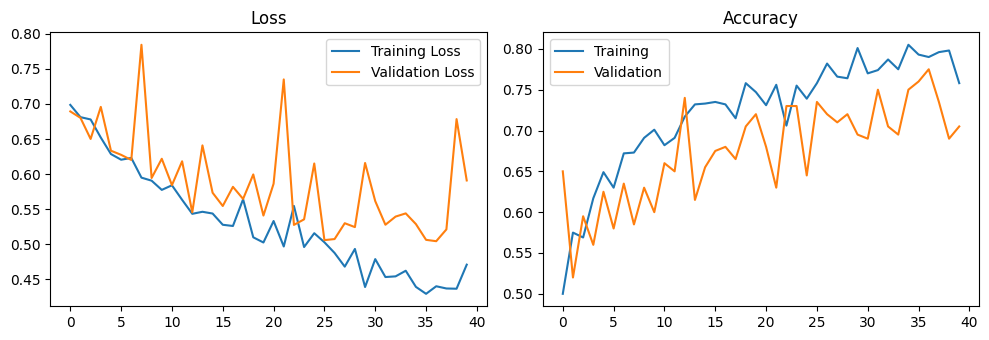

In [30]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.tight_layout()
plt.show()



In [31]:
acc = model.evaluate(val_set, steps=len(val_set), verbose=0)
print('score = {:.3f}'.format(acc[1]))

score = 0.705


### Test and using Model

In [32]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

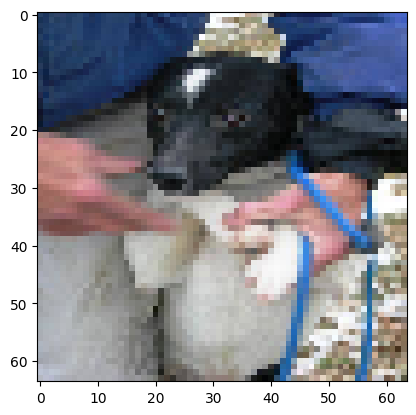

In [33]:
target_img_shape = (64, 64)
test_image = load_img('./test_set/1.jpg', target_size=target_img_shape)
test_image = img_to_array(test_image)
test_image /= 255.0

plt.imshow(test_image)
plt.show()

In [34]:
test_image = np.expand_dims(test_image, axis=0)

In [35]:
test_image.shape

(1, 64, 64, 3)

In [36]:
result = model.predict(test_image)
result

1/1 [==============================] - 0s 185ms/step


array([[0.7119018]], dtype=float32)

In [37]:
train_set.class_indices

{'cat': 0, 'dog': 1}

In [38]:
if result[0][0] > 0.5:
	predict='Dog'
else:
	predict='Cat'


In [39]:
predict

'Dog'

In [40]:
def predict_dog_cat(lst):
	y_pred = []
	y_pred_cls = []
	img_lst = []

	for i in lst:
		img = load_img(i, target_size=target_img_shape)
		img = img_to_array(img)
		img /= 255.0
		img_lst.append(img)

		img = np.expand_dims(img, axis=0)
		y_pred_i = model.predict(img)
		y_pred_cls_i = 'Dog' if y_pred_i[0][0] > 0.5 else 'Cat'
		y_pred.append(y_pred_i)
		y_pred_cls.append(y_pred_cls_i)

	return img_lst, y_pred_cls, y_pred

In [41]:
import glob

mylist = [f for f in glob.glob('./test_set/*')]
img_lst, y_pred_cls, y_pred = predict_dog_cat(mylist)

mylist
for i in mylist:
	print(os.path.basename(i), end= ' | ')

1/1 [==============================] - 0s 22ms/step
1.jpg | 10.jpg | 100.jpg | 11.jpg | 12.jpg | 13.jpg | 14.jpg | 15.jpg | 16.jpg | 17.jpg | 18.jpg | 19.jpg | 2.jpg | 20.jpg | 21.jpg | 22.jpg | 23.jpg | 24.jpg | 25.jpg | 26.jpg | 27.jpg | 28.jpg | 29.jpg | 3.jpg | 30.jpg | 31.jpg | 32.jpg | 33.jpg | 34.jpg | 35.jpg | 36.jpg | 37.jpg | 38.jpg | 39.jpg | 4.jpg | 40.jpg | 41.jpg | 42.jpg | 43.jpg | 44.jpg | 45.jpg | 46.jpg | 47.jpg | 48.jpg | 49.jpg | 5.jpg | 50.jpg | 51.jpg | 52.jpg | 53.jpg | 54.jpg | 55.jpg | 56.jpg | 57.jpg | 58.jpg | 59.jpg | 6.jpg | 60.jpg | 61.jpg | 62.jpg | 63.jpg | 64.jpg | 65.jpg | 66.jpg | 67.jpg | 68.jpg | 69.jpg | 7.jpg | 70.jpg | 71.jpg | 72.jpg | 73.jpg | 74.jpg | 75.jpg | 76.jpg | 77.jpg | 78.jpg | 79.jpg | 8.jpg | 80.jpg | 81.jpg | 82.jpg | 83.jpg | 84.jpg | 85.jpg | 86.jpg | 87.jpg | 88.jpg | 89.jpg | 9.jpg | 90.jpg | 91.jpg | 92.jpg | 93.jpg | 94.jpg | 95.jpg | 96.jpg | 97.jpg | 98.jpg | 99.jpg | 

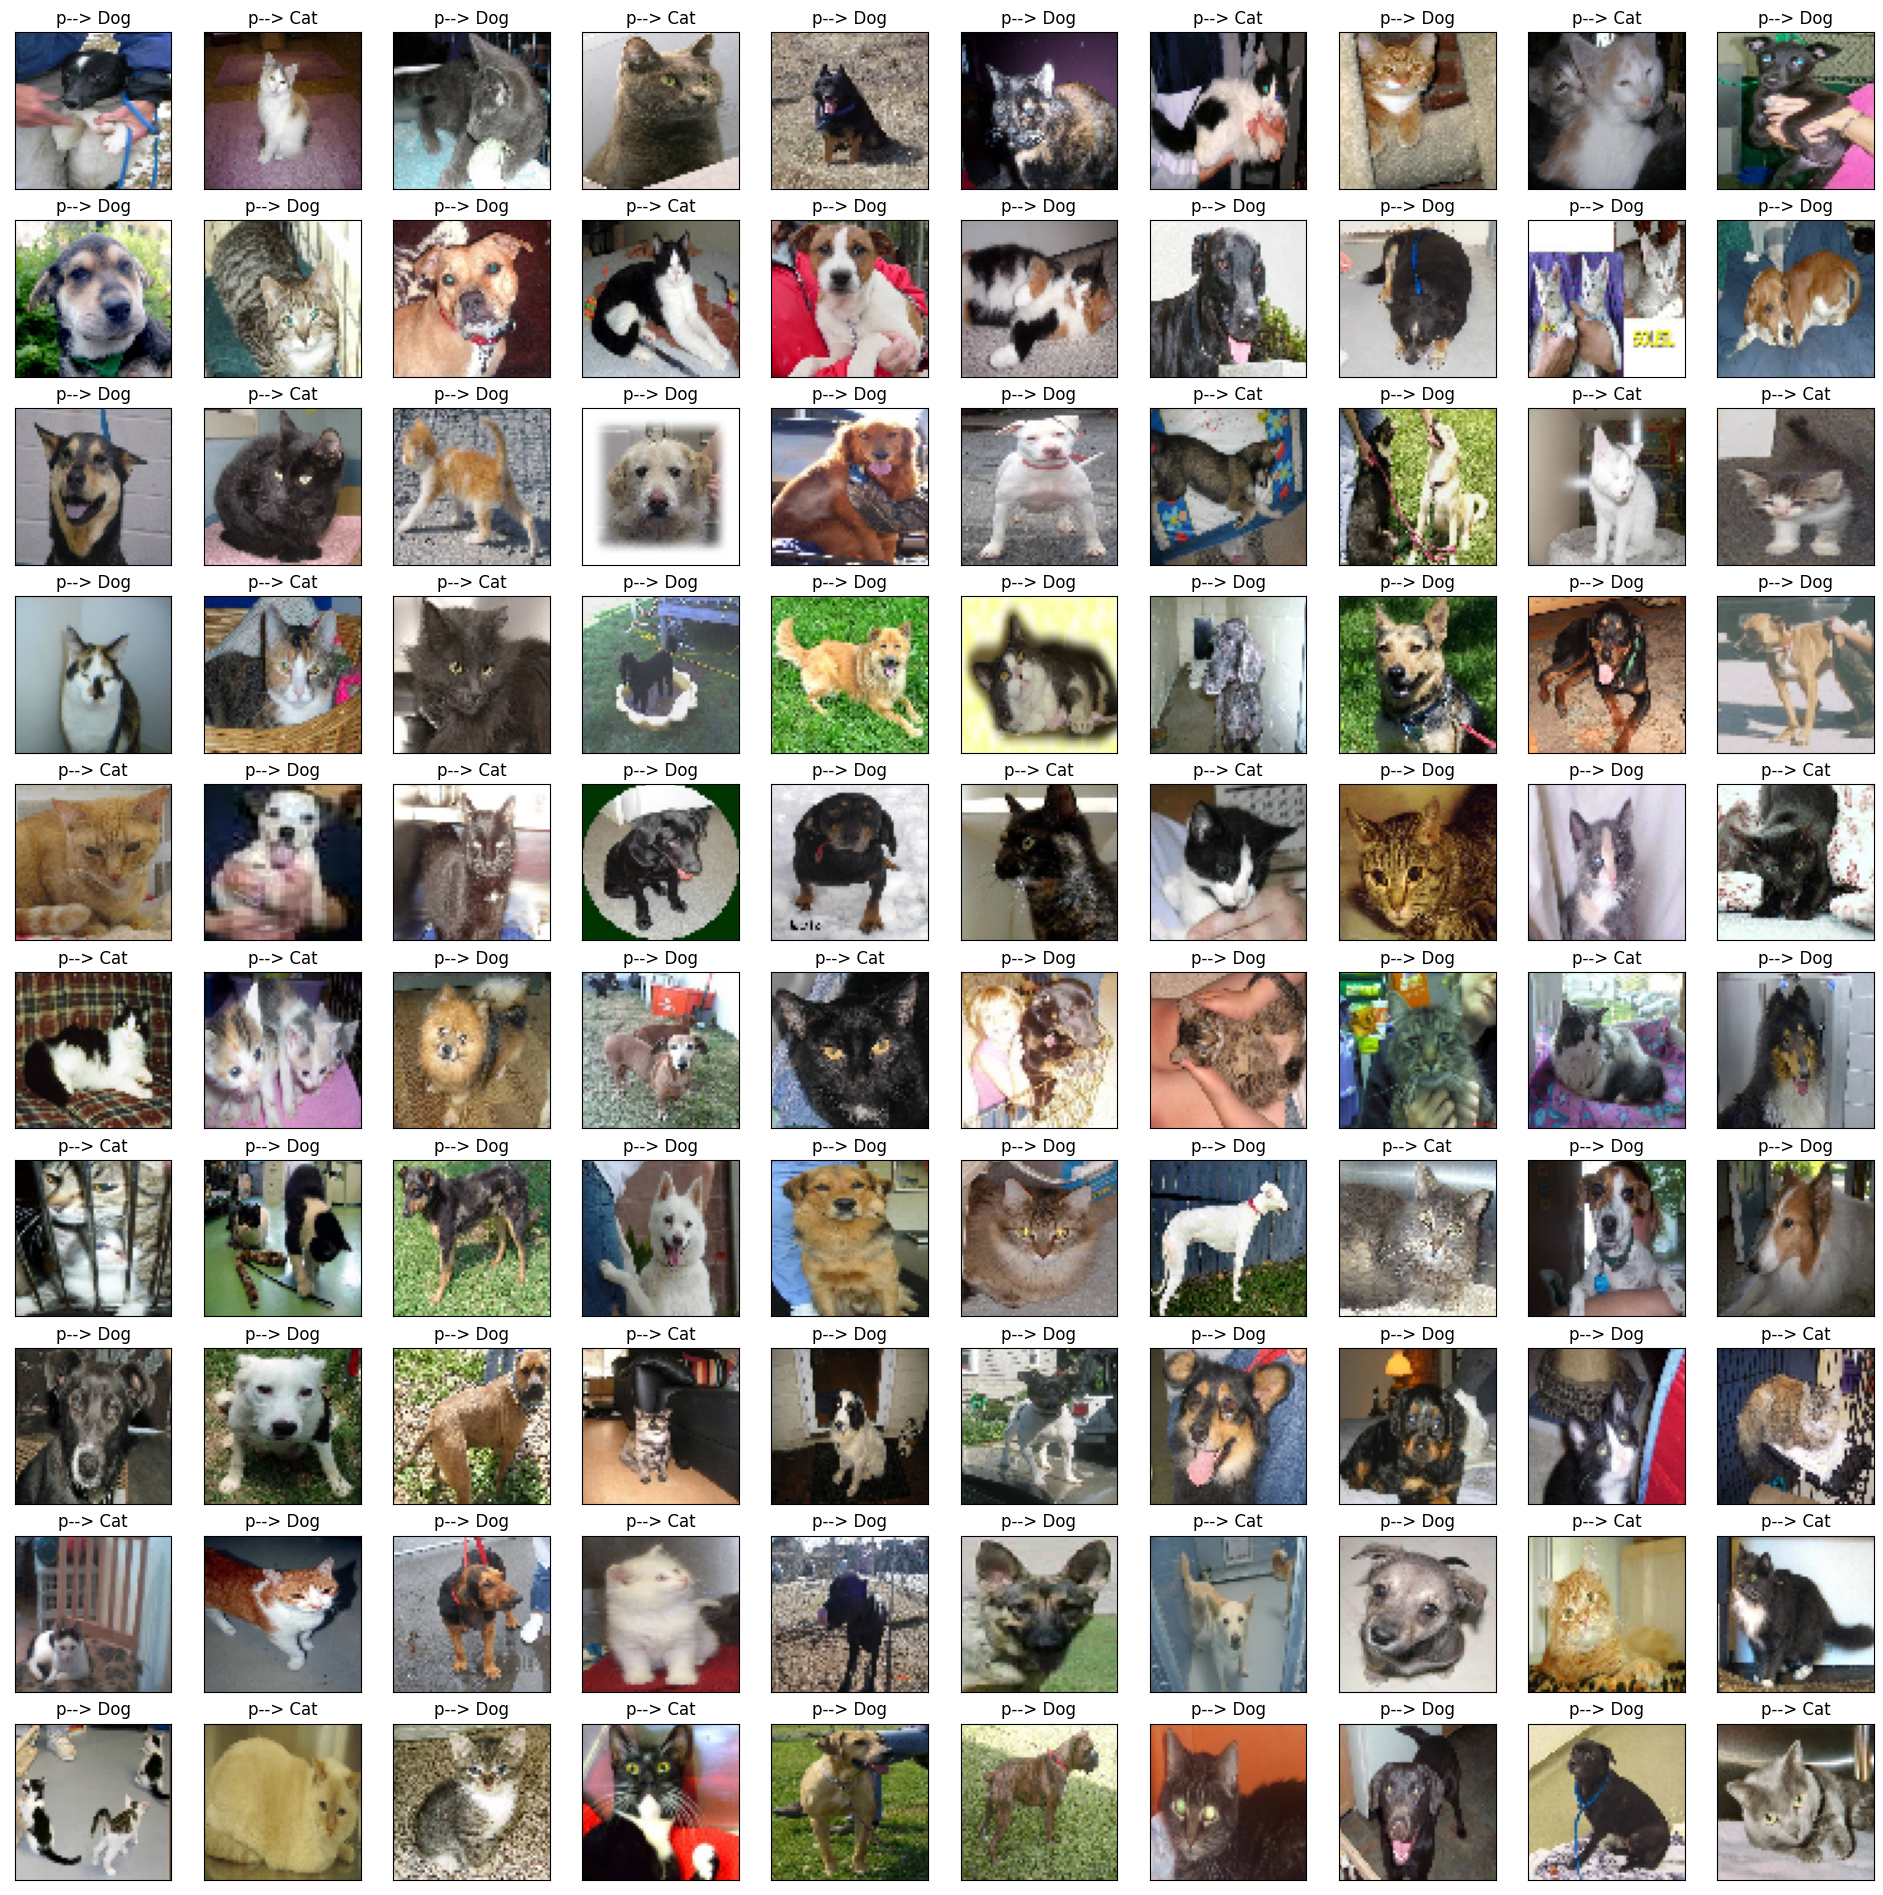

In [42]:
plt.figure(figsize=(24, 24))
for i,k in enumerate(img_lst):
	plt.subplot(10, 10, i + 1)
	plt.imshow(k)
	plt.title('p--> {}'.format(y_pred_cls[i]))
	plt.xticks([])
	plt.yticks([])
plt.show()